# LENDING CLUB CASE STUDY

#### 1. Imported All Modules Used in the Case Study

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Loading the Loan Data of Customers

In [176]:
cust_loan_data = pd.read_csv("loan.csv")

#### 3. Checked Data is Loaded or Not

In [177]:
print("Customer's Loan Data for the first 5 rows: \n\n\n", cust_loan_data.head())
print("\n\n")
print("Shape of the Data: \n\n", cust_loan_data.shape)

Customer's Loan Data for the first 5 rows: 


         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0  

#### 4. Finding Missing Value Data and Dropping Missing Value Data which has more than 50 percentage

In [204]:
missingcolumns_loan_data = cust_loan_data.columns[(cust_loan_data.isnull().sum() / len(cust_loan_data.index))* 100 > 50]
print("columns which are having more than 50 percentage of null values: \n\n\n", missingcolumns_loan_data)
print("\n\n")
cust_loan_data = cust_loan_data.drop(missingcolumns_loan_data, axis=1)
print("After Dropping missing columns the updated customer loan data: \n\n\n", cust_loan_data)

columns which are having more than 50 percentage of null values: 


 Index([], dtype='object')



After Dropping missing columns the updated customer loan data: 


        loan_amount  term  int_rate  installment grade sub_grade  \
1             2500   60      15.27        59.83     C        C4   
3            10000   36      13.49       339.31     C        C1   
6             7000   60      15.96       170.08     C        C5   
7             3000   36      18.64       109.43     E        E1   
9             5375   60      12.69       121.45     B        B5   
...            ...   ...       ...          ...   ...       ...   
39551        12375   36      10.91       404.62     C        C3   
39562         4800   36      10.28       155.52     C        C1   
39623         9000   36      12.49       301.04     D        D3   
39666        15450   36      11.22       507.46     C        C4   
39680         3000   36      11.86        99.44     D        D1   

      home_ownership  annual_i

#### 5. To Get Columns Null Percentage 

In [179]:
print("Shape of the Data: \n\n", cust_loan_data.shape)
print("\n\n")
print("Percentage of null column data in cust loan data")
cust_loan_data.isnull().sum() / len(cust_loan_data)* 100

Shape of the Data: 

 (39717, 54)



Percentage of null column data in cust loan data


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### 6. Dropping the Rows which have Null values Based on the following SUBSET

In [180]:
cust_loan_data.dropna(subset=['emp_title', 'emp_length', 'revol_util','desc', 'last_pymnt_d','title', 'last_credit_pull_d', 'pub_rec_bankruptcies', ], inplace=True)
print("Shape of the Data: \n\n", cust_loan_data.shape)
print("\n\n")
print("Percentage of null column data in updated cust loan data")
cust_loan_data.isnull().sum() / len(cust_loan_data)* 100

Shape of the Data: 

 (24408, 54)



Percentage of null column data in updated cust loan data


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.000000
purpose                       0.000000
title                         0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

#### 7. Dropping the Unwanted Columns 

Desc - Description is given by Borrower - It is not needed for our Prediction <br>
Member ID, ID - These are Unique Identifiers which are not Useful for our prediction <br>
Url - url's is not needed

In [181]:
cust_loan_data=cust_loan_data.drop(['desc', 'member_id', 'id', 'url'], axis=1)

delinq_amnt - Past due amount is not needed for the present data <br>
acc_now_delinq - Borrower deliquent data is not needed <br>
application_type - type of the account doesnot give any infomation <br>
policy_code - Based on the policy type for public available/not doesnot effect the loan<br>
pymt_plan - payment plan is not at all needed<br>
intial_list_status - Is it W/F Based on that we cannot get anything so dropping off <br>
chargeoff_within_12_mths - Charging is not effects the Defaulter/Full paid <br>
tax_liens - Tax will not give the defaulter information <br>
collections_12_mths_ex_med - Collection Excluding will not give the defaulter information <br>

In [182]:
cust_loan_data=cust_loan_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'], axis=1)

To Check the Null Percentage Data is Not Greater than 50

In [183]:
print("Shape of the Data: \n\n", cust_loan_data.shape)
print("\n\n")
print("Percentage of null column data in updated cust loan data: \n\n")
print(cust_loan_data.isnull().sum() / len(cust_loan_data)* 100)
print("\n\n")
print("Columns list: \n\n",cust_loan_data.columns)

Shape of the Data: 

 (24408, 41)



Percentage of null column data in updated cust loan data: 


loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out

# 

funded_amnt - funded amnt and loan_amnt are same so dropping one <br>
zip_code - District code is not needed for the defaulters <br>
addr_state - State wise may not required <br>

In [184]:
cust_loan_data=cust_loan_data.drop(['funded_amnt', 'zip_code', 'addr_state'], axis=1)

In [185]:
print("Shape of the Data: \n\n", cust_loan_data.shape)
print("\n")
print("Columns list: \n\n",cust_loan_data.columns)

Shape of the Data: 

 (24408, 38)


Columns list: 

 Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [186]:
cust_loan_data =cust_loan_data[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'last_pymnt_amnt', 'pub_rec_bankruptcies']]
print("final customer loan data for the first five customers: \n\n", cust_loan_data.head())
print("\n")
print("Shape of the Data: \n\n", cust_loan_data.shape)

final customer loan data for the first five customers: 

    loan_amnt        term int_rate  installment grade sub_grade home_ownership  \
1       2500   60 months   15.27%        59.83     C        C4           RENT   
3      10000   36 months   13.49%       339.31     C        C1           RENT   
4       3000   60 months   12.69%        67.79     B        B5           RENT   
6       7000   60 months   15.96%       170.08     C        C5           RENT   
7       3000   36 months   18.64%       109.43     E        E1           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
1     30000.0     Source Verified  Dec-11  Charged Off                 car   
3     49200.0     Source Verified  Dec-11   Fully Paid               other   
4     80000.0     Source Verified  Dec-11      Current               other   
6     47004.0        Not Verified  Dec-11   Fully Paid  debt_consolidation   
7     48000.0     Source Verified  Dec-11   Fully Paid           

#### 8. Dropping Current paying customers which are not Defaulters

In [187]:
cust_loan_data=cust_loan_data[cust_loan_data['loan_status']!="Current"]
print("Shape of the Data: \n\n", cust_loan_data.shape)

Shape of the Data: 

 (23729, 19)


#### 9. Removing the % as it is used for intrest rate we required only Numeric Value

In [188]:
cust_loan_data['int_rate'] = cust_loan_data.int_rate.str.strip('%').astype(float)
cust_loan_data['revol_util'] = cust_loan_data.revol_util.str.strip('%').astype(float)
print("customer loan data for the first five customers: \n\n", cust_loan_data.head())
print("\n")
print("Shape of the Data: \n\n", cust_loan_data.shape)

customer loan data for the first five customers: 

    loan_amnt        term  int_rate  installment grade sub_grade  \
1       2500   60 months     15.27        59.83     C        C4   
3      10000   36 months     13.49       339.31     C        C1   
6       7000   60 months     15.96       170.08     C        C5   
7       3000   36 months     18.64       109.43     E        E1   
9       5375   60 months     12.69       121.45     B        B5   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

              purpose    dti  delinq_2yrs  inq_last_6mths  pub_rec  \
1                 car   1.00        

#### 10. There are two terms either 36/60 months but months are not required so removing months

In [189]:
cust_loan_data["term"]=cust_loan_data["term"].apply(lambda term_val: term_val.replace('months',''))
print("customer loan data for the first five customers: \n\n", cust_loan_data.head())
print("\n")
print("Shape of the Data: \n\n", cust_loan_data.shape)

customer loan data for the first five customers: 

    loan_amnt  term  int_rate  installment grade sub_grade home_ownership  \
1       2500   60      15.27        59.83     C        C4           RENT   
3      10000   36      13.49       339.31     C        C1           RENT   
6       7000   60      15.96       170.08     C        C5           RENT   
7       3000   36      18.64       109.43     E        E1           RENT   
9       5375   60      12.69       121.45     B        B5           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
1     30000.0     Source Verified  Dec-11  Charged Off                 car   
3     49200.0     Source Verified  Dec-11   Fully Paid               other   
6     47004.0        Not Verified  Dec-11   Fully Paid  debt_consolidation   
7     48000.0     Source Verified  Dec-11   Fully Paid                 car   
9     15000.0            Verified  Dec-11  Charged Off               other   

     dti  delinq_2yrs 

#### 11. Converting issue_d column from Dec-11 to 1-12-2011 and from that getting month 12 and 2011 
####        Creating new Columns issued_year and issued_month

In [190]:
cust_loan_data['issue_d'] = pd.to_datetime(cust_loan_data.issue_d, format='%b-%y')
cust_loan_data['issue_d'] = cust_loan_data['issue_d'].apply(lambda date: date-pd.DateOffset(years=100) if date.year > 2021 else date)
cust_loan_data["issued_year"] = cust_loan_data["issue_d"].dt.year
cust_loan_data["issued_month"] = cust_loan_data["issue_d"].dt.month
print("customer loan data for the first five customers: \n\n", cust_loan_data.head())
print("\n")
print("Shape of the Data: \n\n", cust_loan_data.shape)

customer loan data for the first five customers: 

    loan_amnt  term  int_rate  installment grade sub_grade home_ownership  \
1       2500   60      15.27        59.83     C        C4           RENT   
3      10000   36      13.49       339.31     C        C1           RENT   
6       7000   60      15.96       170.08     C        C5           RENT   
7       3000   36      18.64       109.43     E        E1           RENT   
9       5375   60      12.69       121.45     B        B5           RENT   

   annual_inc verification_status    issue_d  ...             purpose    dti  \
1     30000.0     Source Verified 2011-12-01  ...                 car   1.00   
3     49200.0     Source Verified 2011-12-01  ...               other  20.00   
6     47004.0        Not Verified 2011-12-01  ...  debt_consolidation  23.51   
7     48000.0     Source Verified 2011-12-01  ...                 car   5.35   
9     15000.0            Verified 2011-12-01  ...               other  18.08   

   delinq_

#### 12. Renaming the Columns which are not understanding

In [191]:
cust_loan_data.rename(columns = {'dti':'debt_to_income','loan_amnt':'loan_amount','issue_d':'issue_date','annual_inc':'annual_income','delinq_2yrs':'deliquency_2yrs', 'revol_util':'revolving_utilization', 'inq_last_6mths': 'inqueries_last_6mths'}, inplace = True)
print("customer loan data for the first five customers: \n\n", cust_loan_data.head())

customer loan data for the first five customers: 

    loan_amount  term  int_rate  installment grade sub_grade home_ownership  \
1         2500   60      15.27        59.83     C        C4           RENT   
3        10000   36      13.49       339.31     C        C1           RENT   
6         7000   60      15.96       170.08     C        C5           RENT   
7         3000   36      18.64       109.43     E        E1           RENT   
9         5375   60      12.69       121.45     B        B5           RENT   

   annual_income verification_status issue_date  ...             purpose  \
1        30000.0     Source Verified 2011-12-01  ...                 car   
3        49200.0     Source Verified 2011-12-01  ...               other   
6        47004.0        Not Verified 2011-12-01  ...  debt_consolidation   
7        48000.0     Source Verified 2011-12-01  ...                 car   
9        15000.0            Verified 2011-12-01  ...               other   

  debt_to_income  deli

#### 13. BoxPlot and DistPlot for Loan Amount to identify how is the data and identifying outliers data

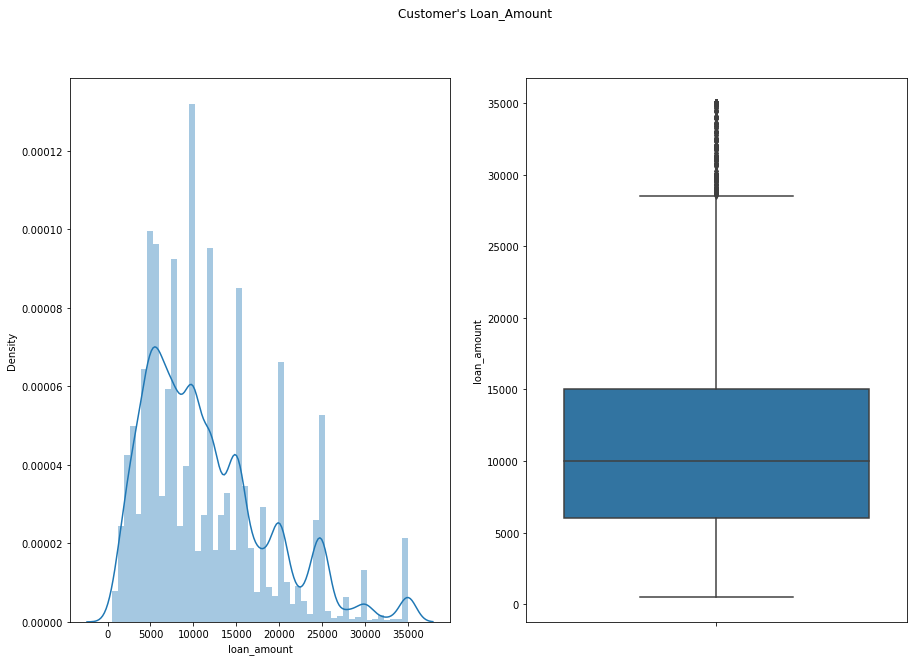

In [192]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.distplot(a=cust_loan_data["loan_amount"]) 
plt.subplot(1,2,2)
sns.boxplot(y=cust_loan_data["loan_amount"]) 
plt.suptitle("Customer's Loan_Amount")
plt.show()

#### 14. CountPlot from the loan_status : Fully Paid > Charged Off

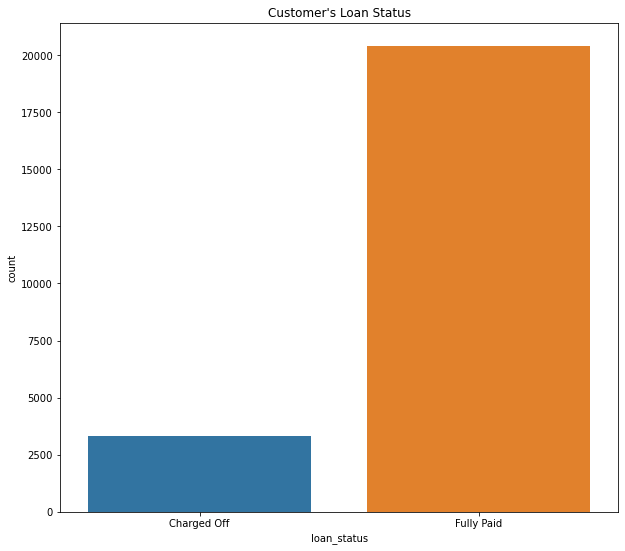

In [193]:
plt.figure(figsize=(10,9))
sns.countplot(x = 'loan_status', data = cust_loan_data)
plt.title("Customer's Loan Status")
plt.show()

#### 15. Count Plot On GRADE Column

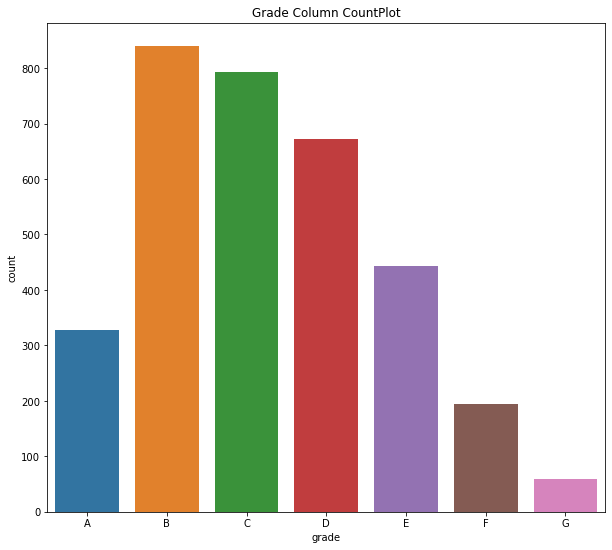

In [194]:
plt.figure(figsize=(10,9))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Grade Column CountPlot")
plt.show()

 B Grade has the Most Deafulters 

#### 16. Count Plot on Sub Grade Column

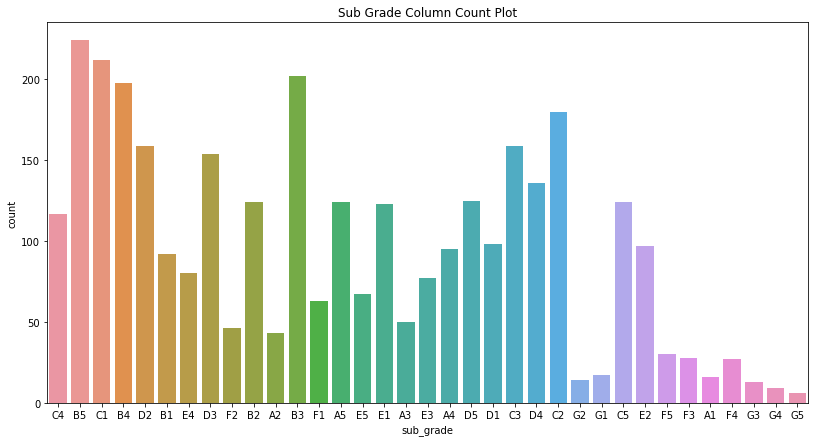

In [195]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'sub_grade', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Sub Grade Column Count Plot")
plt.show()

In B Grade as well inside that <b>B5 has the most Defaulters

#### 17. CountPlot on Purpose Column

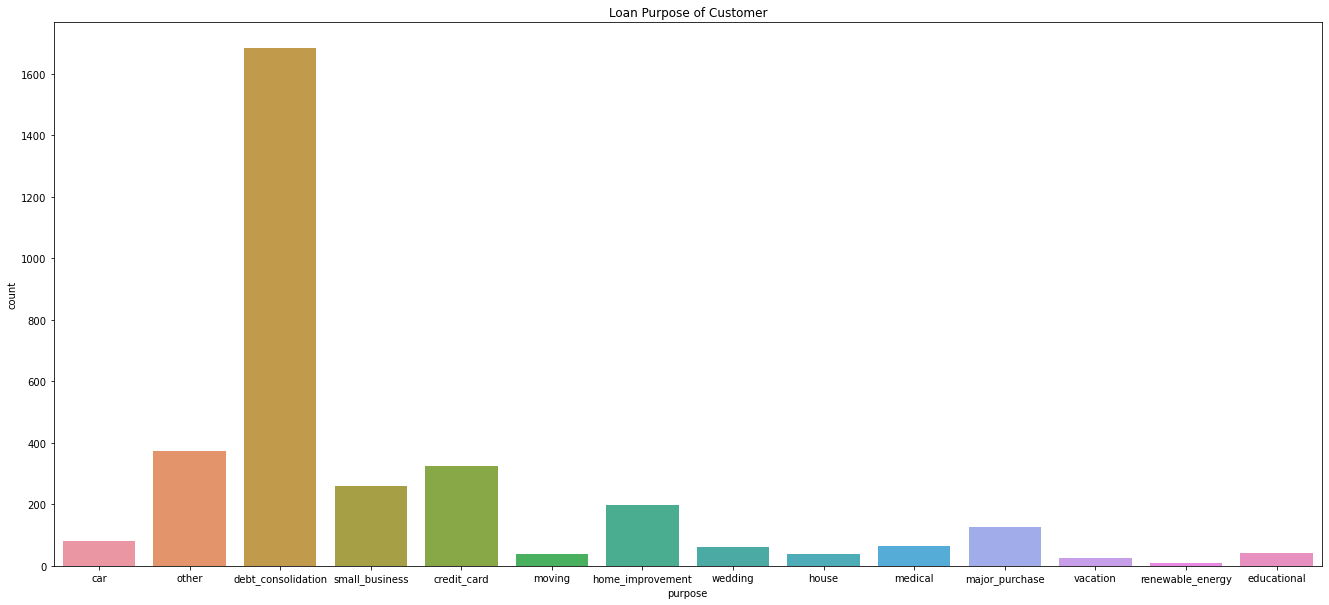

In [196]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
sns.countplot(x = 'purpose', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Loan Purpose of Customer")
plt.show()

 Debt_consolidation column has more defaulters

#### 18. CountPlot on Home_Ownership

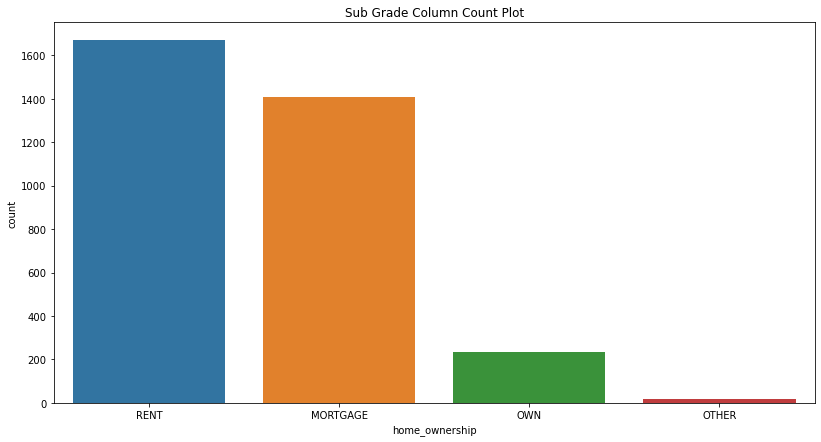

In [197]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'home_ownership', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Sub Grade Column Count Plot")
plt.show()

HomeOwnership - Rent type has more type of Defaulters

#### 15. DistPlot and BoxPlot for annual_income 

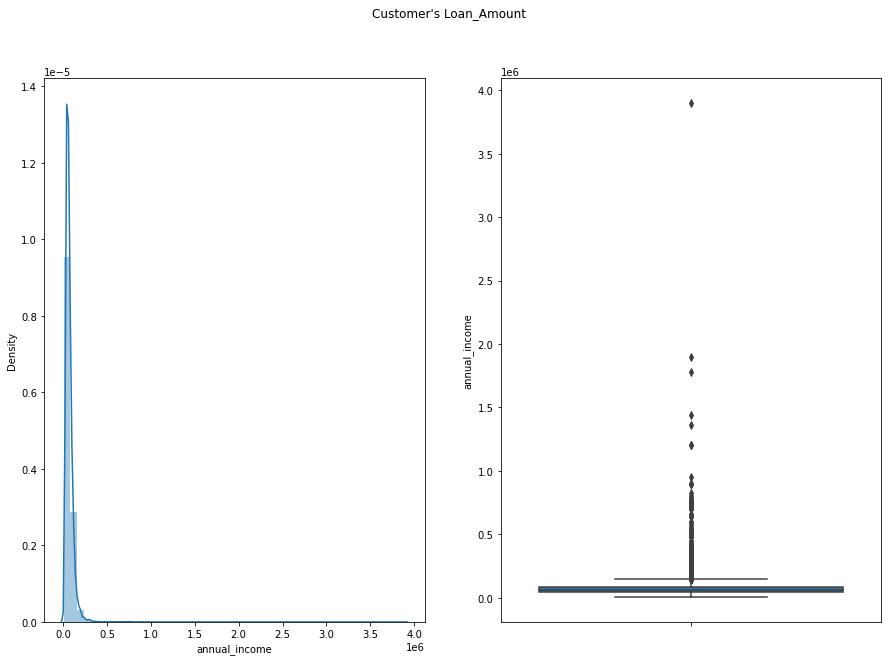

In [198]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.distplot(a=cust_loan_data["annual_income"]) 
plt.subplot(1,2,2)
sns.boxplot(y=cust_loan_data["annual_income"]) 
plt.suptitle("Customer's Loan_Amount")
plt.show()

annual income has mostly only one high annual_income value so we can remove it

In [199]:
cust_loan_data =cust_loan_data[cust_loan_data["annual_income"] < cust_loan_data["annual_income"].quantile(0.95)]
print("max annual_income: \n",cust_loan_data['annual_income'].max())
print("\n")
print("min annual_income: \n",cust_loan_data['annual_income'].min())

max annual_income: 
 139992.0


min annual_income: 
 4000.0


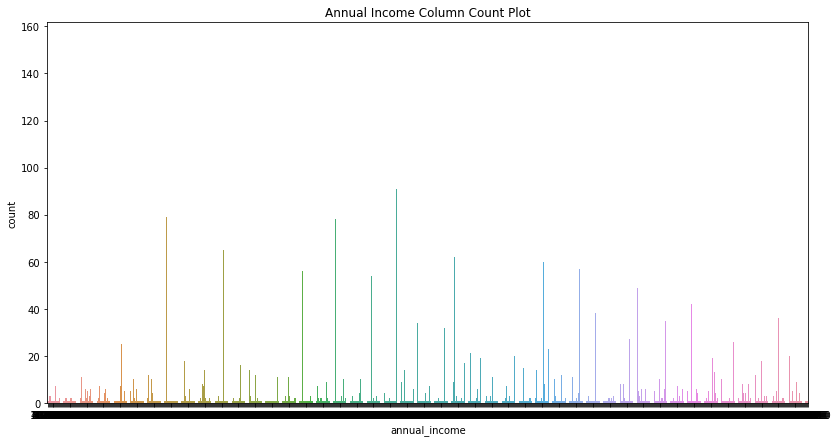

In [200]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'annual_income', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Annual Income Column Count Plot")
plt.show()

hard to identify, we will do in terms of sub annual groups

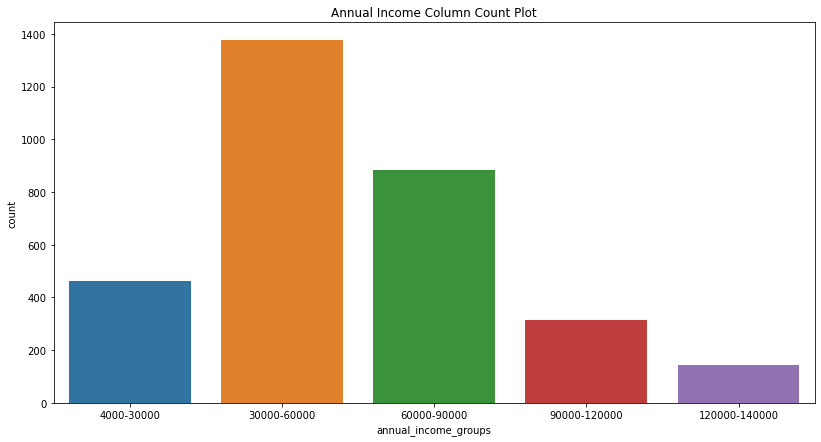

In [201]:
cust_loan_data['annual_income_groups'] = pd.cut(cust_loan_data['annual_income'], bins=5,labels =['4000-30000','30000-60000','60000-90000','90000-120000','120000-140000'])
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'annual_income_groups', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Annual Income Column Count Plot")
plt.show()

30k-60k annual_income_groups has most of the defaulters

#### 16. Verification Status Count Plot

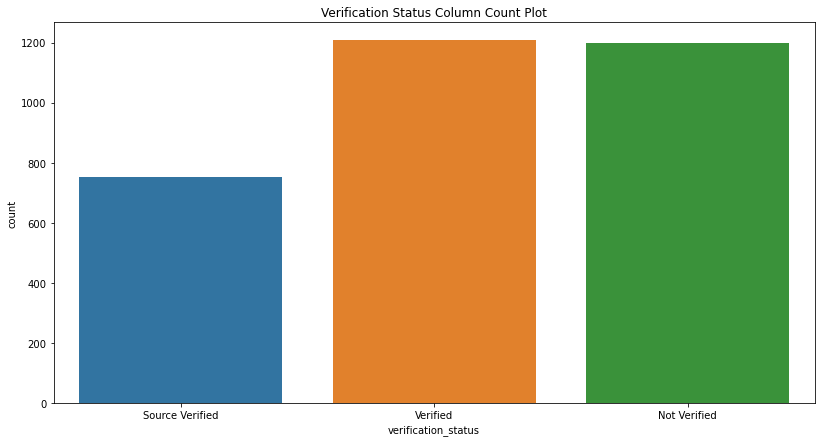

In [132]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'verification_status', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Verification Status Column Count Plot")
plt.show()

From the above Figure both Verified and Not Verified are same so we cannot come to any Conclusion

In [206]:
print(" Max Intrest value: ",cust_loan_data['int_rate'].max())
print(" Min Intrest value: ",cust_loan_data['int_rate'].min())

 Max Intrest value:  24.4
 Min Intrest value:  5.42


#### 17. Intrest Rate Grouping into 4 groups and Count Plot

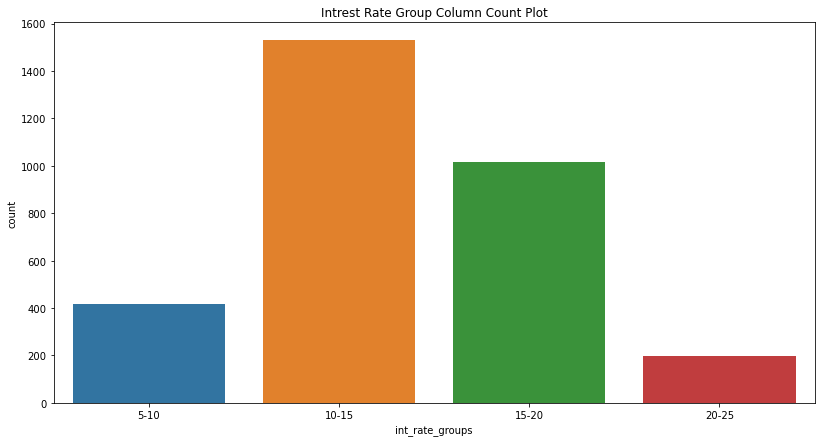

In [136]:
cust_loan_data['int_rate_groups'] = pd.cut(cust_loan_data['int_rate'], bins=4 ,labels =['5-10', '10-15','15-20','20-25'])
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'int_rate_groups', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Intrest Rate Group Column Count Plot")
plt.show()

10 - 15 interest has most of the defaulters

#### 18. Revolving_Utilization Count Plot and grouping into 4 bins

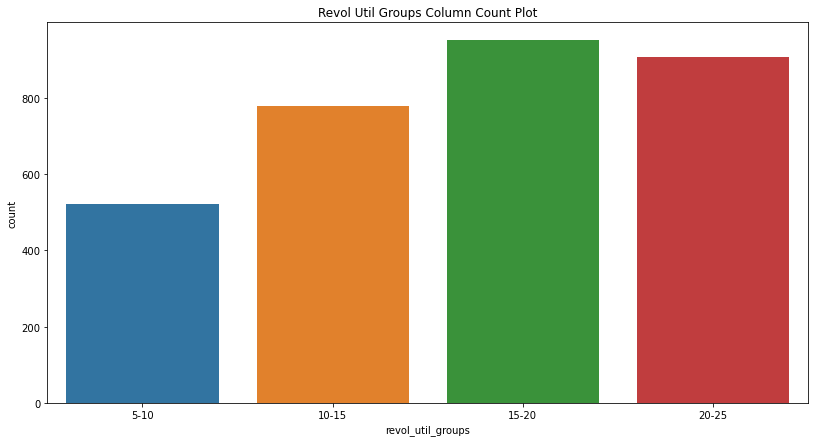

In [138]:
cust_loan_data['revol_util_groups'] = pd.cut(cust_loan_data['revolving_utilization'], bins=4 ,labels =['5-10', '10-15','15-20','20-25'])
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = 'revol_util_groups', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Revol Util Groups Column Count Plot")
plt.show()

15 - 20 interest has most of the defaulters

#### 19. Term Column's CountPlot 

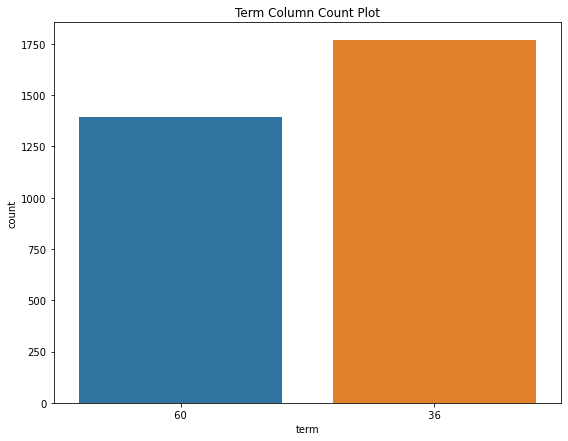

In [139]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = 'term', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Term Column Count Plot")
plt.show()

term which have 36 months have most of the defaulters

#### 20. Issued Year Count Plot 

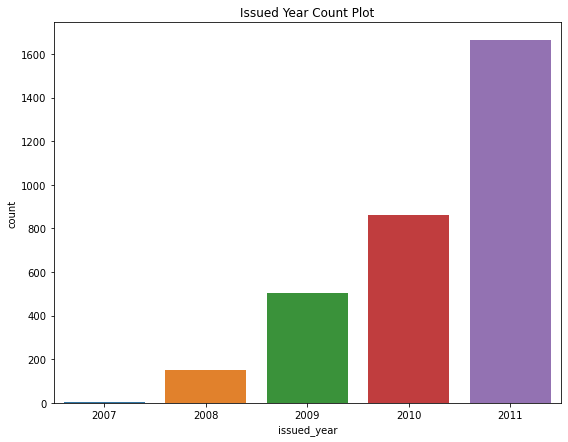

In [202]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = 'issued_year', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.title("Issued Year Count Plot")
plt.show()

2011 year customers have most defaulters

#### 21. Correlation Between the Columns on the Customer_Loan_Data

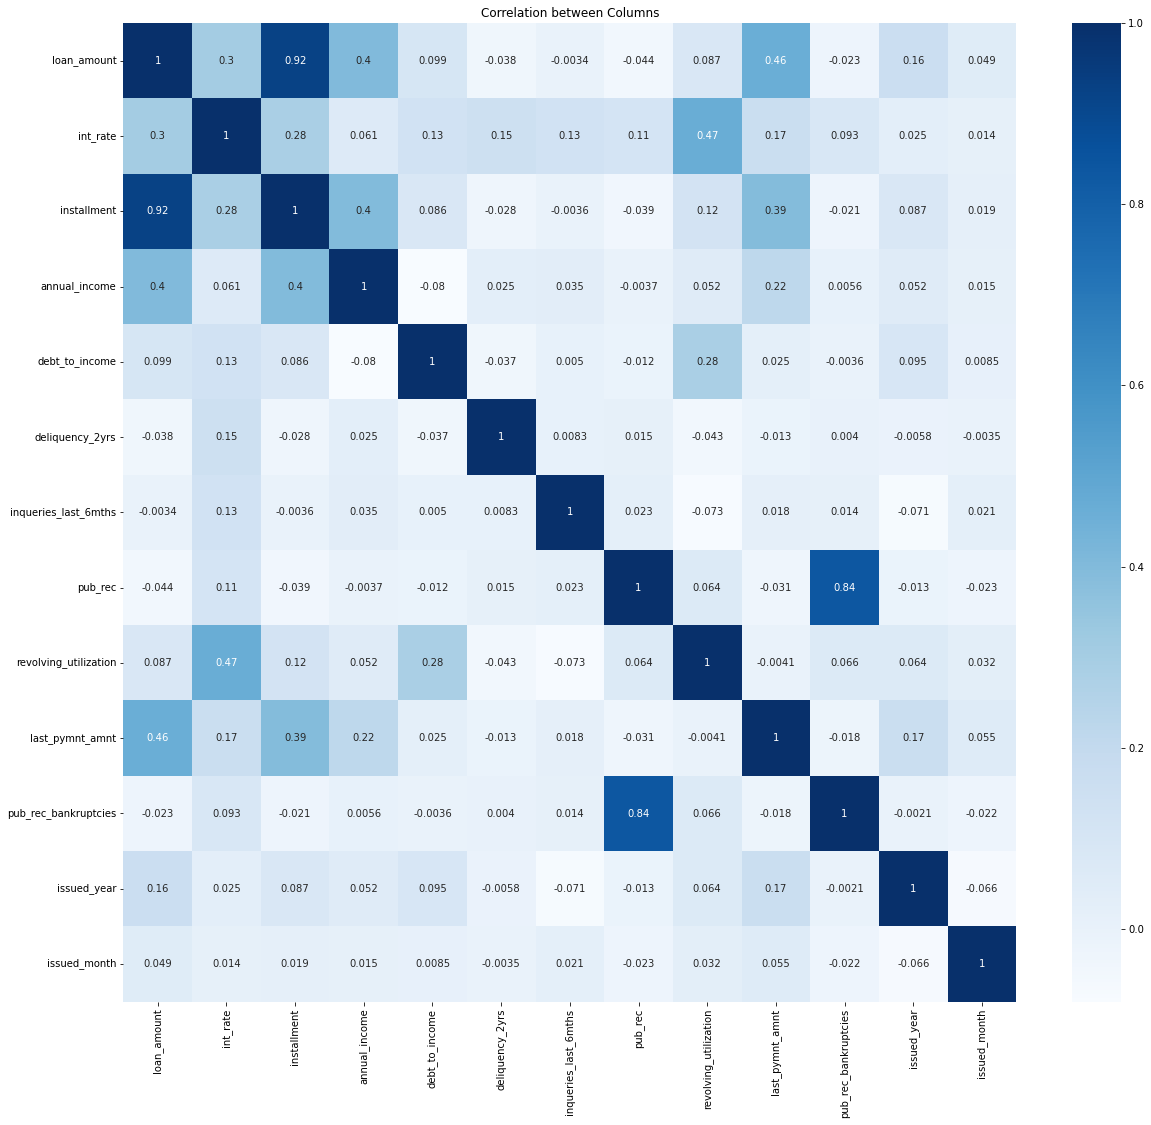

In [203]:
plt.figure(figsize=(20,18))
sns.heatmap(cust_loan_data.corr(), annot = True, cmap='Blues')
plt.title("Correlation between Columns")
plt.show()

loan_amount and installement has positive correlation
pub_rec and pub_rec_bankruptcies has positive correlation

#### 22. Bivariate Analysis between Columns using Barplot

In [214]:
def bar_plot_bivariate(col_1,col_2):
    plt.figure(figsize=(12,7))
    sns.barplot(data =cust_loan_data,x=col_1, y=col_2, hue ='loan_status')
    plt.title(col_1+" VS "+col_2)
    plt.show()

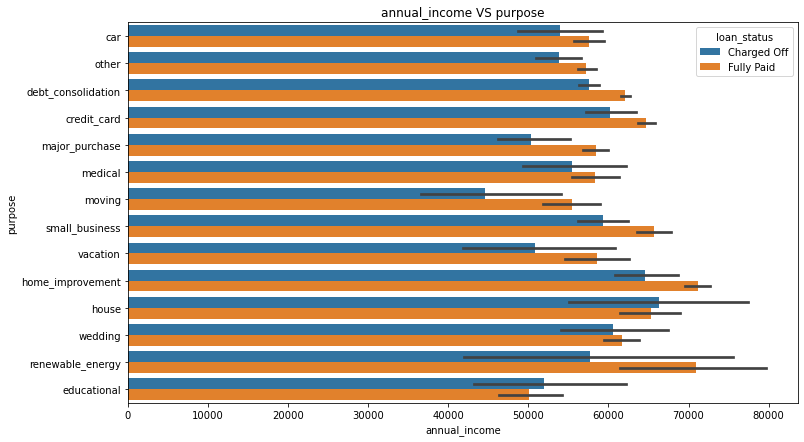

In [219]:
bar_plot_bivariate('annual_income', 'purpose')

60k -70k annual income , who has taken loan for house and home_improvement are defaulters

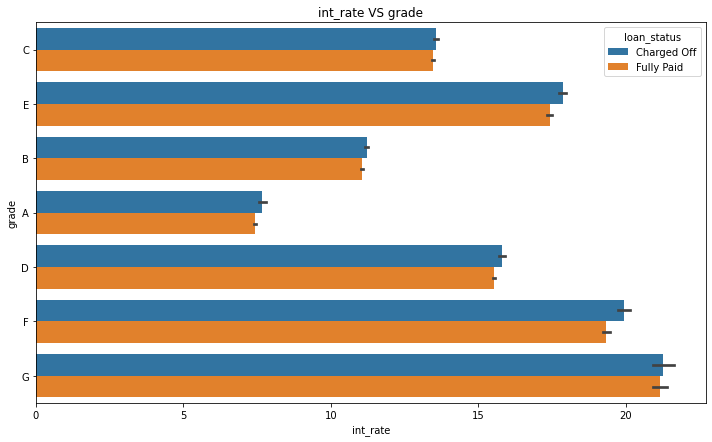

In [218]:
bar_plot_bivariate('int_rate', 'grade')

G grade customers having most interest rate as well so these are the Defaulters

## observation on the Customer Loan Data:

After Analysis We got to know that, The following Columns will help us to identify most of the defaulters:<br><br>
    1. Interest rate <br>
    2. Grades/Subgrades <br>
    3. Annual Income <br>
    4. Issued Year <br> 
    5. Purpose <br>
    6. House Owner <br>
    